In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Load S&P 500 data (^GSPC is the ticker for S&P 500 on Yahoo Finance)
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start="2010-01-01")

# Keep only necessary columns (Open, High, Low, Close, Volume)
sp500_data = sp500_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Replace missing values with previous row's value (forward fill)
sp500_data.fillna(method='ffill', inplace=True)

# Reset index to make 'Date' a column (since it's currently the index)
sp500_data.reset_index(inplace=True)

# Convert datetime to date (removes time component)
sp500_data['Date'] = sp500_data['Date'].dt.date

# Reorder columns to have Date first
sp500_data = sp500_data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# Save to CSV file
sp500_data.to_csv("cleaned_sp500_price_2010_to_present.csv", index=False)
print("S&P 500 data from 2010 to present saved to cleaned_sp500_price_2010_to_present.csv")




S&P 500 data from 2010 to present saved to cleaned_sp500_price_2010_to_present.csv


/var/folders/j0/w_nkzt051mn4tt9zkz40drc80000gp/T/ipykernel_66606/3025316424.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sp500_data.fillna(method='ffill', inplace=True)


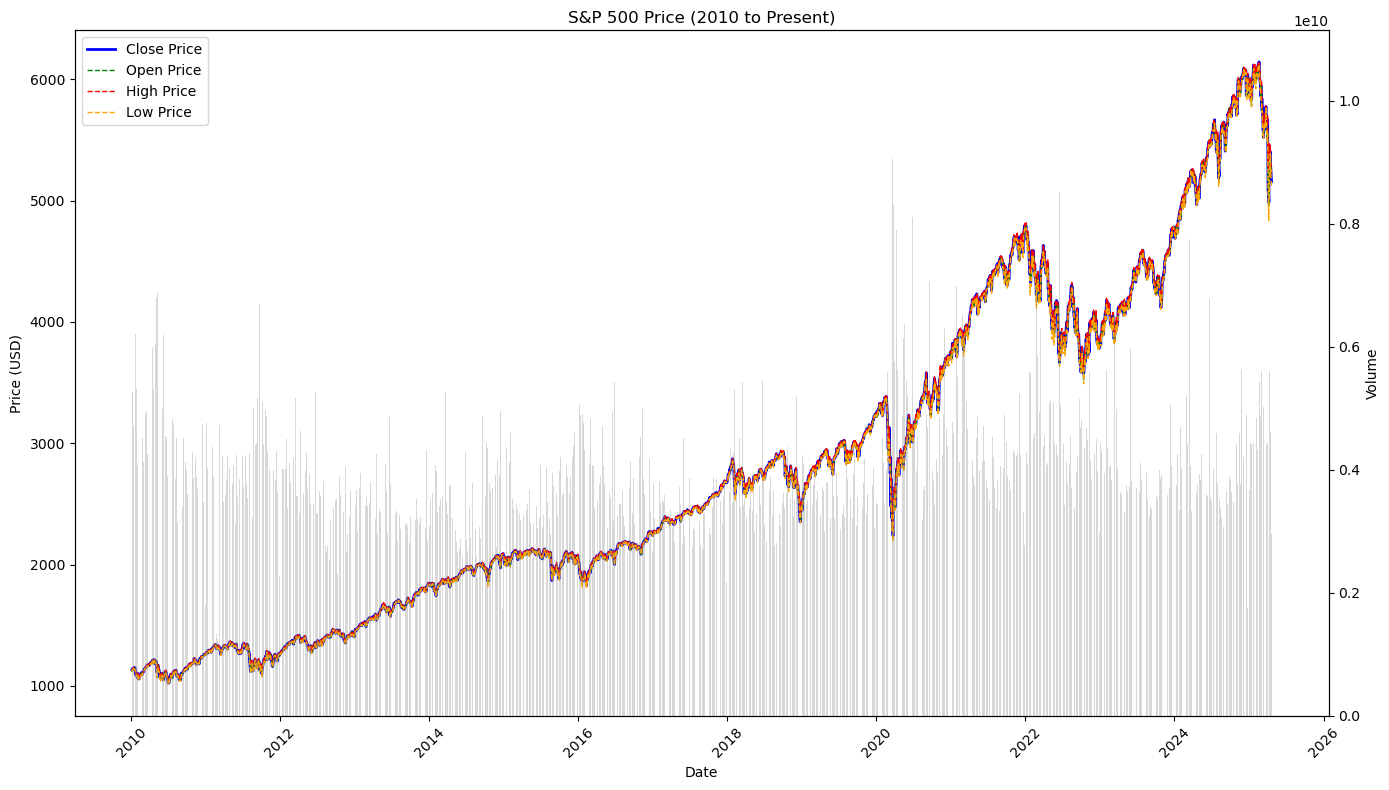

In [3]:
import matplotlib.pyplot as plt

# Load the cleaned S&P 500 data from the CSV file
df = sp500_data

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a figure with two subplots: one for price and one for volume
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the S&P 500 price (Open, High, Low, Close)
ax1.plot(df['Date'], df['Close'], label='Close Price', color='blue', linewidth=2)
ax1.plot(df['Date'], df['Open'], label='Open Price', color='green', linestyle='--', linewidth=1)
ax1.plot(df['Date'], df['High'], label='High Price', color='red', linestyle='--', linewidth=1)
ax1.plot(df['Date'], df['Low'], label='Low Price', color='orange', linestyle='--', linewidth=1)

# Adding labels, title, and legend
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)')
ax1.set_title('S&P 500 Price (2010 to Present)')
ax1.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Create a second axis for the volume (bar chart)
ax2 = ax1.twinx()  # This shares the same x-axis
ax2.bar(df['Date'], df['Volume'], color='gray', alpha=0.3)

# Adding labels for the volume plot
ax2.set_ylabel('Volume')

# Display the chart
plt.tight_layout()
plt.show()
